## Logistic Regression
------------------------
Logistic regression models the probabilities for classification problems with two possible outcomes. It’s an extension of the linear regression model for classification problems.   

The linear regression model can work well for regression, but fails for classification. Why is that? In case of two classes, you could label one of the classes with 0 and the other with 1 and use linear regression. Technically it works and most linear model programs will spit out weights for you. But there are a few problems with this approach:
1. A linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities.
2. A linear model also extrapolates and gives you values below zero and above one. This is a good sign that there might be a smarter approach to classification.
3. Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other.
4. Linear models do not extend to classification problems with multiple classes. You would have to start labeling the next class with 2, then 3, and so on. The classes might not have any meaningful order, but the linear model would force a weird structure on the relationship between the features and your class predictions.   

A solution for classification is logistic regression. Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as: $\sigma(z) = \frac{1}{1+e^{-z}}$
 
And it looks like this: <img src="https://christophm.github.io/interpretable-ml-book/images/logistic-function-1.png" width="500"/> <center>It outputs numbers between 0 and 1. At input 0, it outputs 0.5.</center>   
In the linear regression model, we have modelled the relationship between outcome and features with a linear equation: <center>$\hat y^i=β_{0}+β_{1}x_{1}^i+…+β_{p}x_{p}^i$</center>  
For classification, we prefer probabilities between 0 and 1, so we wrap the right side of the equation into the logistic function. This forces the output to assume only values between 0 and 1.  
<center>$P(y^i=1)=\displaystyle\frac{1}{1+exp(-(β_{0}+β_{1}x_{1}^i+…+β_{p}x_{p}^i))}$</center>   

#### Derivative of the logistic function
Since neural networks typically use gradient based opimization techniques such as gradient descent it is important to define the derivative of the output y of the logistic function with respect to its input z. ${\partial y}/{\partial z}$can be calculated as: $\frac{\partial y}{\partial z} = \frac{\partial \sigma(z)}{\partial z} 
= \frac{\partial \frac{1}{1+e^{-z}}}{\partial z} 
= \frac{-1}{(1+e^{-z})^2} \cdot e^{-z} \cdot -1 
= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}}$. And since $1 - \sigma(z)) = 1 - {1}/(1+e^{-z}) = {e^{-z}}/(1+e^{-z})$ this can be rewritten as: $\frac{\partial y}{\partial z} 
= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} 
= \sigma(z) \cdot (1- \sigma(z)) =  y (1-y)$

#### The cross-entropy loss function
We need a loss function that expresses, for an observation x, how close the classifier
output $(\hat y = \sigma(w· x+b))$ is to the correct output (y, which is 0 or 1). $L(\hat y, y)$ = How much $\hat y$ differs from the true y. We do this via a loss function that prefers the correct class labels of the training examples to be more likely. This is called conditional maximum likelihood estimation: we choose the parameters w,b that maximize the log probability of the true y labels in the training data given the observations x. 

The resulting loss function is the negative log likelihood loss, generally called the cross-entropy loss. Since there are only two discrete outcomes (1 or 0), this is a Bernoulli distribution, and we can express the probability $p(y|x)$ that our classifier produces for one observation as $p(y|x) = (\hat y)^y(1−\hat y)^{1−y}$.  

Next, take the log of both sides, and whatever values maximize a probability will also maximize the log of the probability. $\log p(y|x) = \log (\hat y)^y(1−\hat y)^{1−y} = y \log \hat y + (1−y) \log (1−\hat y) $  In order to turn this into loss function (something that we need to minimize), we’ll just flip the sign. The result is the cross-entropy loss $L$: $L(\hat y, y) = −\log p(y|x) = −[y \log \hat y + (1−y) \log (1−\hat y)]$. Plug in the definition of $\hat y = \sigma(w·x+b)$: $L(\hat y, y) = −[y \log \sigma(w·x+b) + (1−y) \log (1−\sigma(w· x+b))]$

#### Derivative of loss function 
Now we take derivative of w and b with respect to $L$: $\frac{\partial L(\hat y, y)}{\partial w_{j}} = [\sigma(w· x+b)−y]x_{j}$ ;  $\frac{\partial L(\hat y, y)}{\partial b} = [\sigma(w· x+b)−y]$

#### Gradient Descent
Then, we can use gradient descent to update the weight and bias. We have explained gradient descent concept in the preceptron section. 
Everytime when the prediction is not correct, the gradient descent will help to correct the weight vector to the right direction for the next iteration. $\alpha$ is the learning rate and the gradient descent for the weight is $[σ(w· x+b)−y]x_{j}$ and for the bias is $σ(w· x+b)−y$

<center>$w_{updated}\rightarrow w_{old} - \alpha[\sigma(w· x+b)−y]x_{j}$</center>
<center>$b_{updated}\rightarrow b_{old} - \alpha(\sigma(w· x+b)−y)$</center>

---------------------

### In Class Example
---------------------

In class we implement losgistric regression for binary classification using the candidates dataset.
Our task is to classify wheather a student was admitted or rejected by Rice based on their GMAT and GPA. In order to do this we will need the following libraries:

* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)

Import libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
df = pd.read_csv("candidates_data.csv")

Make gmat and gpa as X matrix and admitted as y vector.

In [2]:
X = df[["gmat", "gpa"]].to_numpy()
Y = df["admitted"].to_numpy()

#### Min-max scaling
Next, we scale the X features by [min-max scaling](https://en.wikipedia.org/wiki/Feature_scaling). Min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/358923abc154221bb5022fc329061f6fc4dcc69f" width="150"/> where x is an original value, ${\displaystyle x'}$ is the normalized value.

In [3]:
X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

Plot GMAT vs GPA

Text(0, 0.5, 'GPA (normalized)')

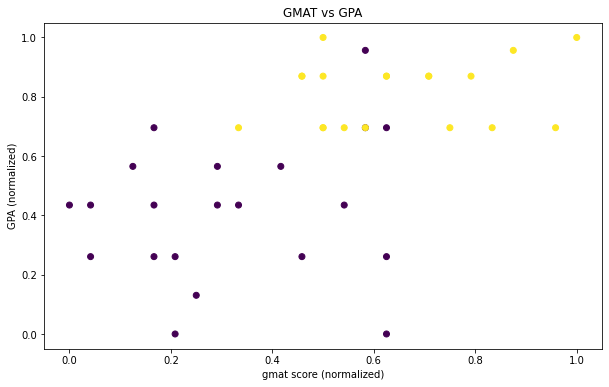

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.title("GMAT vs GPA")
plt.xlabel("gmat score (normalized)")
plt.ylabel("GPA (normalized)")

Plot GMAT vs Accepted or not (1 is accepted 0 is not accepted)

Text(0, 0.5, 'accepted or not')

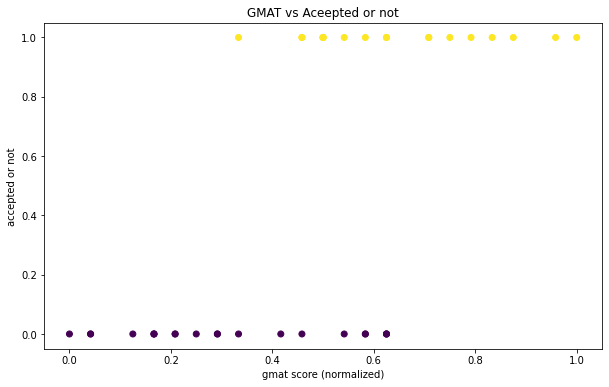

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.title("GMAT vs Aceepted or not")
plt.xlabel("gmat score (normalized)")
plt.ylabel("accepted or not")

Next, we write a sigmoid function and plot it

Text(0, 0.5, 'Probability')

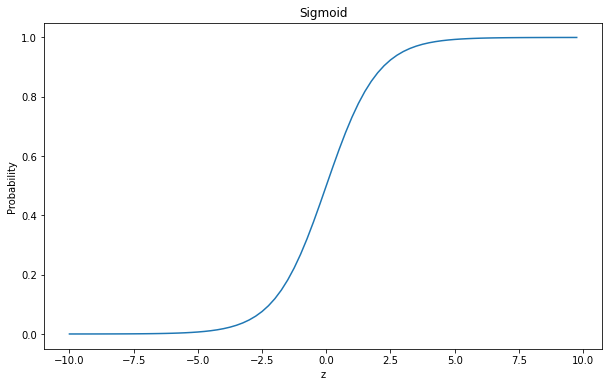

In [6]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))
plt.title("Sigmoid")
plt.xlabel("z")
plt.ylabel("Probability")

Next dedine a cross entropy loss function: $L(\hat y, y) = −\log p(y|x) = −[y \log \hat y + (1−y) \log (1−\hat y)]$

In [7]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

Test what is the loss if we have true label 1 and y hat 0.5

In [8]:
cross_entropy_loss(1.0, .5)

0.6931471805599453

Define derivative of the loss entropy loss $\frac{\partial L(\hat y, y)}{\partial w_{j}} = [\hat y − y]x_{j}$ ;  $\frac{\partial L(\hat y, y)}{\partial b} = [\hat y −y]$ and also define a feed forward function (feed into sigmoid function).

In [9]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)

Set initial weights and bias by randomly sampling from normal distribution, and learning rate alpha = 0.25. And we try plugging in the first X into feedforward. 

In [10]:
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.25
feed_forward(X[0], w, b)

0.2716707800809042

Implement Stochastic Gradient Descent. Iterate 10,000 times and record the loss at each iteration.

In [11]:
# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 30.524554065055995
Total Loss at time 1001 = 11.989331535666398
Total Loss at time 2001 = 11.158166411081506
Total Loss at time 3001 = 10.921764270791389
Total Loss at time 4001 = 10.827064406549388
Total Loss at time 5001 = 10.78244306903358
Total Loss at time 6001 = 10.759332285023426
Total Loss at time 7001 = 10.746615368008216
Total Loss at time 8001 = 10.739326275131116
Total Loss at time 9001 = 10.73502777677839


Define a prediction function. If the probabilty of predicting label 1 is greater than a certain number then we will predict it as 1.

In [12]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

See how each of our prediction compare to true label. Finally we can see the accuracy of our prediction. The accuracy is over 80%.

In [13]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
#     print(f"Prediction: {y_hat}")
#     print(f"True label: {y}")
#     print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 85.0%


Let's see if a different scaling method will yeid a different result.

#### Scaling to unit length
Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/193f6afc6bbb9d55b1f025ea04a1c833947e1a74" width="80"/> where x is an original value, ${\displaystyle x'}$ is the normalized value.


Reload data and make X and Y

In [14]:
df = pd.read_csv("candidates_data.csv")
X = df[["gmat", "gpa"]].to_numpy()
Y = df["admitted"].to_numpy()

In [15]:
X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

Train again. Implement Stochastic Gradient Descent. Iterate 10,000 times and record the loss at each iteration. The loss is greater than min-max scaling method.

In [16]:
# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 119.01995978839031
Total Loss at time 1001 = 21.65263606862297
Total Loss at time 2001 = 20.95722989447673
Total Loss at time 3001 = 20.332968302108902
Total Loss at time 4001 = 19.77051632982563
Total Loss at time 5001 = 19.261916028553085
Total Loss at time 6001 = 18.80038363473593
Total Loss at time 7001 = 18.380130118767593
Total Loss at time 8001 = 17.99620601981126
Total Loss at time 9001 = 17.644369277045705


See the result. The accuracy is not even 80% so Min-max scaling performed better here.

In [17]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
#     print(f"Prediction: {y_hat}")
#     print(f"True label: {y}")
#     print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 62.5%


-------------------------------

### Implementation on Different Dataset
---------------------

#### Dataset Information
Here we will use advertising dataset. The dataset contains the information of 1000 people who visited a websit.

The dataset contains 1000 observations and ten variables.  
The seven columns are:
* Daily Time Spent on Site	 (minutes)
* Age	
* Area Income
* Daily Internet Usage
* Ad Topic Line
* City
* Male (1 is male 0 is female)
* Country
* Timestamp
* Clicked on Ad (1 is clicked 0 is not clicked)

###### Our goal is to classify wheather a person click on the Ad based on Daily Time Spent on Site and Age.

The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [numpy](https://numpy.org/doc/)
* [pandas](https://pandasguide.readthedocs.io/en/latest/)
* [seaborn](https://seaborn.pydata.org/)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

Load dataset and see what does it look like

In [19]:
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


#### Exploratory Data Analysis

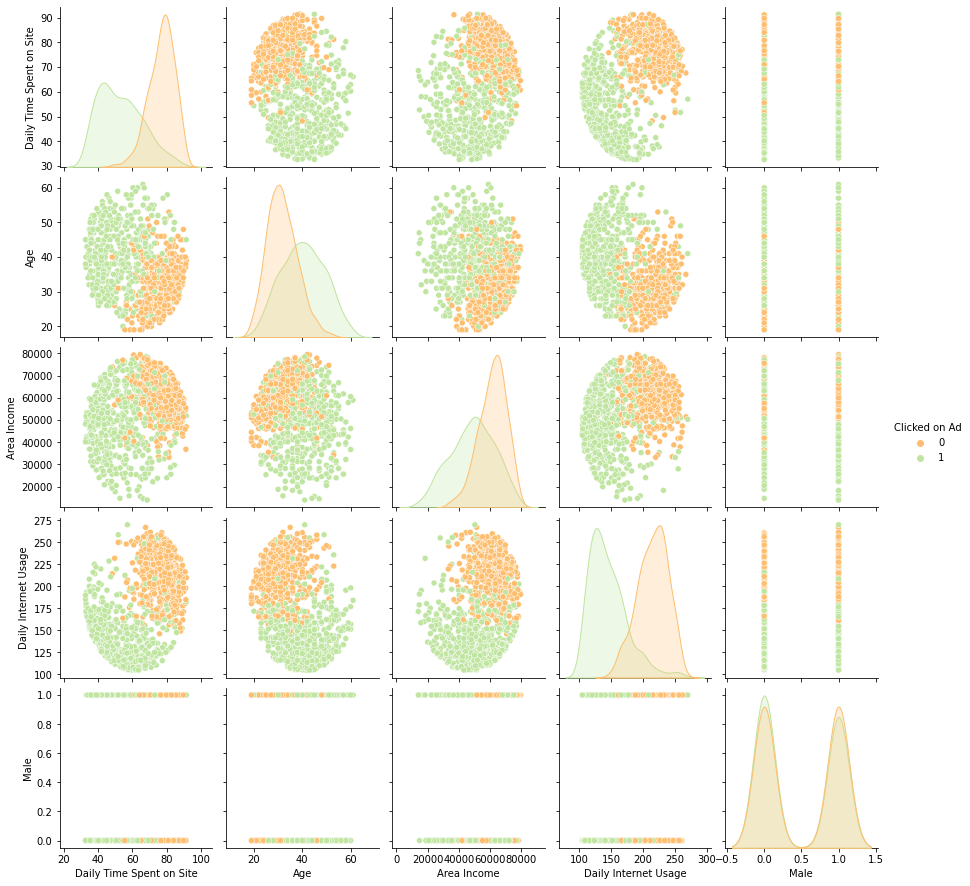

In [22]:
sns.pairplot(df, kind='scatter', hue='Clicked on Ad',palette='Spectral')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Age'>

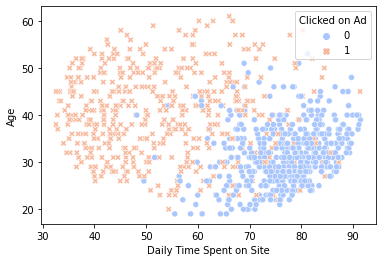

In [23]:
sns.scatterplot(data=df, x='Daily Time Spent on Site', y='Age', hue='Clicked on Ad', palette='coolwarm',style='Clicked on Ad')

Make Daily Time Spent on Site and Age as X matrix and Clicked on Ad as Y vactor. 

In [24]:
X = df[["Daily Time Spent on Site", "Age"]].to_numpy()
Y = df["Clicked on Ad"].to_numpy()

Scale feature (X) by min-max scaling

In [25]:
# X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
# X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

Text(0, 0.5, 'Age (normalized)')

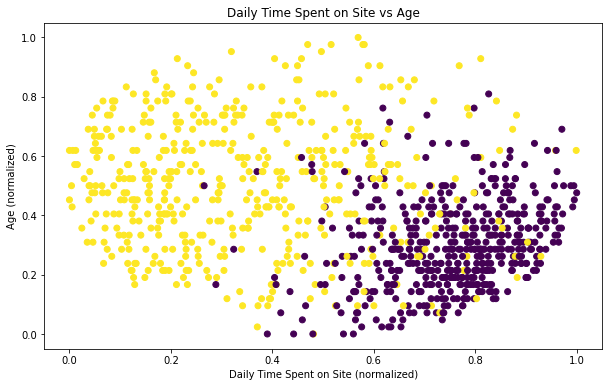

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.title("Daily Time Spent on Site vs Age")
plt.xlabel("Daily Time Spent on Site (normalized)")
plt.ylabel("Age (normalized)")

Plot  vs Accepted or not (1 is cliecked 0 is not clicked)

Text(0, 0.5, 'Clicked on Ad or not')

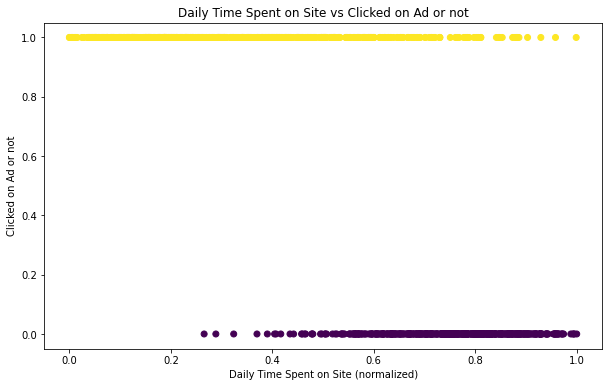

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.title("Daily Time Spent on Site vs Clicked on Ad or not")
plt.xlabel("Daily Time Spent on Site (normalized)")
plt.ylabel("Clicked on Ad or not")

Define a sigmoid functio

In [28]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
# domain = np.arange(-10, 10, .25)
# plt.figure(figsize=(10, 6))
# plt.plot(domain, sigmoid(domain))

Define a cross entropy loss function

In [29]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

In [30]:
# cross_entropy_loss(1.0, .5)

Define derivative of the loss entropy loss and feed forward function.

In [31]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)

Set initial weights and bias by randomly sampling from normal distribution, and learning rate alpha = 0.25. And we try plugging in the first X into feedforward. 

In [32]:
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.25
feed_forward(X[0], w, b)

0.618789797943927

Implement Stochastic Gradient Descent. Iterate 10,000 times and record the loss at each iteration.

In [33]:
# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 832.7041846455844
Total Loss at time 1001 = 288.3248921016515
Total Loss at time 2001 = 269.3226244990945
Total Loss at time 3001 = 264.539502198218
Total Loss at time 4001 = 262.8379265199985
Total Loss at time 5001 = 262.13709045012547
Total Loss at time 6001 = 261.82514852681896
Total Loss at time 7001 = 261.6797968973591
Total Loss at time 8001 = 261.6100895214395
Total Loss at time 9001 = 261.576022431221


Define a prediction function. If the probabilty of predicting label 1 is greater than a certain number then we will predict it as 1.

In [34]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

See how each of our prediction compare to true label. Finally we can see the accuracy of our prediction which is over 80%.

In [35]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
#     print(f"Prediction: {y_hat}")
#     print(f"True label: {y}")
#     print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 83.7%


#### References
datasciencelab, W. by, &amp; by, W. (2014, January 10). Machine learning classics: The Perceptron. The Data Science Lab. Retrieved November 10, 2021, from https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/. 

Speech and Language Processing. Daniel Jurafsky & James H. Martin.Draft of September 21, 2021.